In [8]:
pip install numpy

In [9]:
pip install pandas

In [10]:
pip install seaborn

**MENELAAH DATA**

In [11]:
#menghitung waktu eksekusi
%%time
#impor library
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#mengatur style visualisasi
sns.set()
#plot matplotlib langsung ditampilkan
%matplotlib inline

CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.69 ms


In [12]:
store = pd.read_csv("Superstore Dataset.csv")
store.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [13]:
#menampilkan nilai unique
store.nunique()

,0
Order ID,5009
Order Date,1237
Ship Date,1332
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531
State,49


**PREPROCESSING DATA**

In [14]:
#melihat jumlah baris dan kolom
store.shape
print(f"jumlah kolom : {store.shape[1]}")
print(f"jumlah Baris : {store.shape[0]}")

jumlah kolom : 20
jumlah Baris : 9994


In [15]:
#jumlah missing value
store.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


In [16]:
misspercent=(store.isnull().sum()/len(store))*100
misspercent

,0
Order ID,0.0
Order Date,0.0
Ship Date,0.0
Ship Mode,0.0
Customer ID,0.0
Customer Name,0.0
Segment,0.0
Country,0.0
City,0.0
State,0.0


**VALIDASI DATA**

<Axes: >

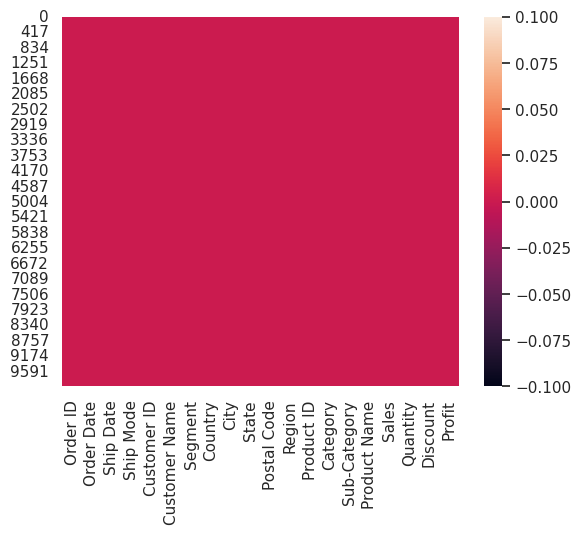

In [17]:
#heatmap missing value
sns.heatmap(store.isnull())

In [18]:
#copy dataset
store_copy=store.copy()
print(f"jumlah kolom data copy : {store_copy.shape[1]}")
print(f"jumlah Baris data copy : {store_copy.shape[0]}")

jumlah kolom data copy : 20
jumlah Baris data copy : 9994


Mencari Outlier

In [19]:
store.describe(include="all")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,5009,1237,1332,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,CA-2022-100111,2021-09-05,2020-12-15,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,14,38,35,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


kolom yang memiliki outlier adalah sales dan profit.

menggunakan boxplot untuk memastikan kolom tersebut outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea9d97484a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea9d9145be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea9d91454c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea9d9146390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea9d91467b0>],
 'means': []}

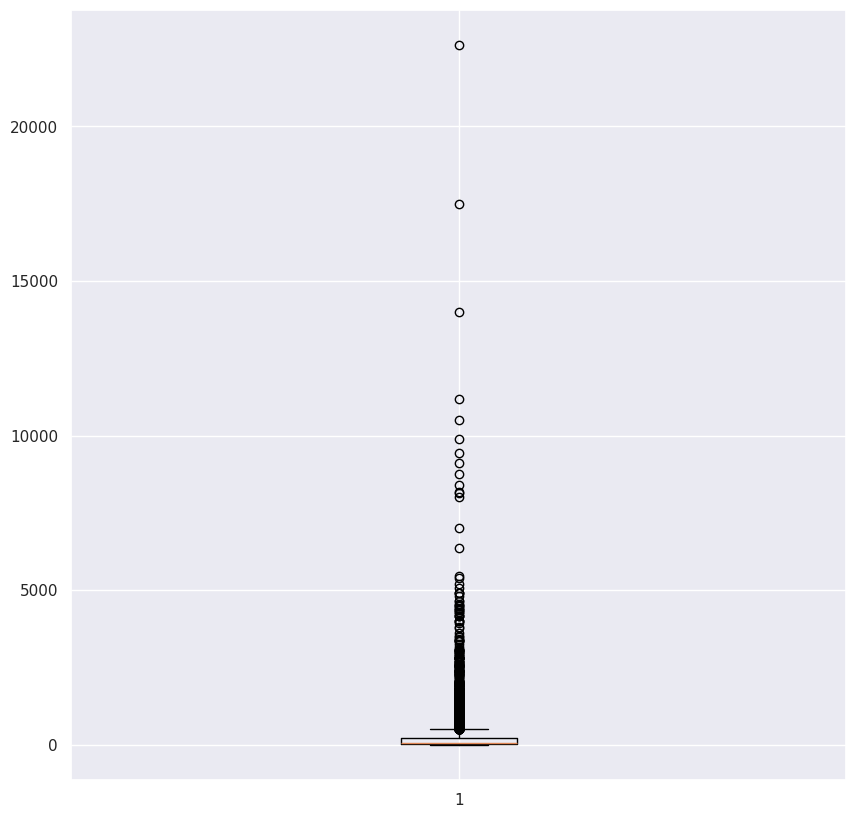

In [20]:
#boxplot melihat Outlier kolom sales
plt.figure(figsize = (10,10))
plt.boxplot(store_copy["Sales"])

In [21]:
# persamaan 1
Q1 = store_copy["Sales"].quantile(0.25)
Q3 = store_copy["Sales"].quantile(0.75)
IQR = Q3 - Q1

# persamaan 2
outlierQ3 = Q3 + 1.5 * IQR

# membuang data outlier
store_copy = store_copy[(store_copy["Sales"] < outlierQ3)]
store_copy["Sales"].describe()

,Sales
count,8827.000000
mean,92.864853
std,114.045078
min,0.444000
25%,15.008000
50%,40.880000
75%,124.225000
max,498.260000


In [22]:
print(f"jumlah kolom data copy : {store_copy.shape[1]}")
print(f"jumlah Baris data copy : {store_copy.shape[0]}")

jumlah kolom data copy : 20
jumlah Baris data copy : 8827


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea9d916f530>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea9d916fb30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea9d916f200>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea9d916ff50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea9d9178290>],
 'means': []}

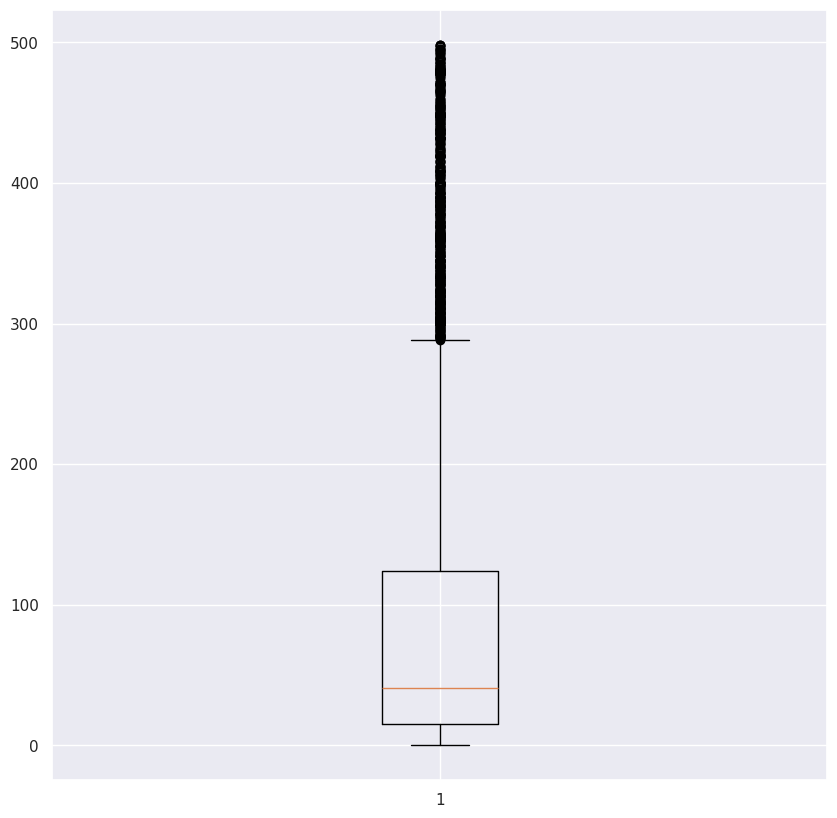

In [23]:
plt.figure(figsize = (10,10))
plt.boxplot(store_copy["Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea9d923a7b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea9d923ae40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea9d923a480>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea9d923ba10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea9d923bd40>],
 'means': []}

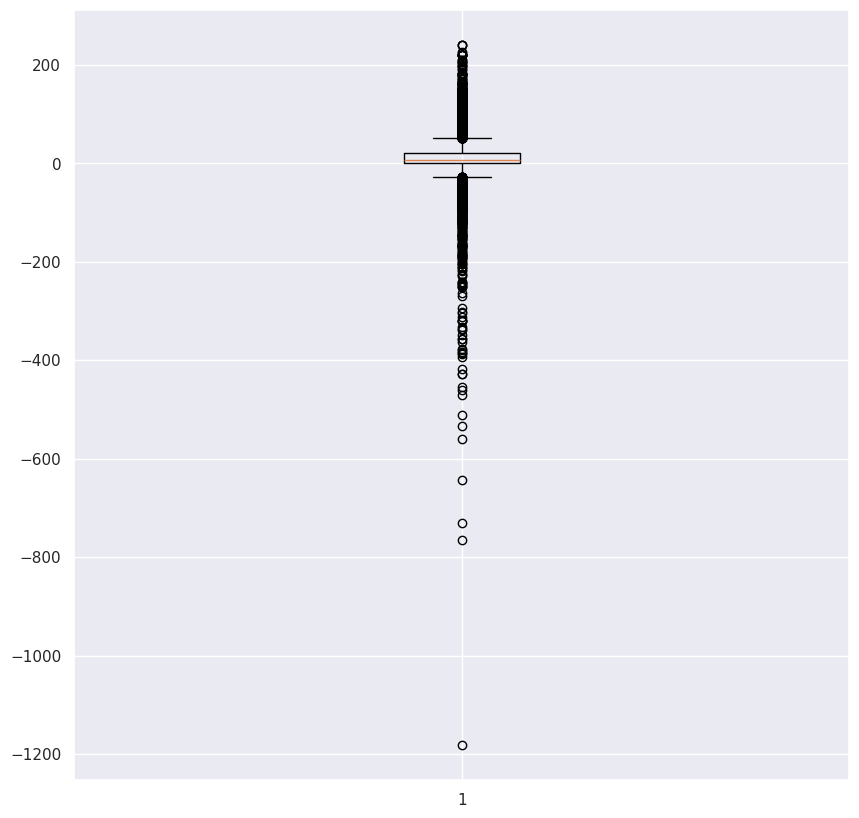

In [24]:

#boxplot melihat outlier profit
plt.figure(figsize = (10,10))
plt.boxplot(store_copy["Profit"])

In [25]:
# persamaan 1
Q1 = store_copy['Profit'].quantile(0.25)
Q3 = store_copy['Profit'].quantile(0.75)
IQR = Q3 - Q1
#persamaan 2
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

store_copy = store_copy[(store_copy['Profit'] >= batas_bawah) & (store_copy['Profit'] <= batas_atas)]


In [26]:
print(f"jumlah kolom data copy : {store_copy.shape[1]}")
print(f"jumlah Baris data copy : {store_copy.shape[0]}")

jumlah kolom data copy : 20
jumlah Baris data copy : 7392


{'whiskers': [<matplotlib.lines.Line2D at 0x7ea9d92ef230>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea9d92ef800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea9d92eef30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea9d92efc80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea9d92eff50>],
 'means': []}

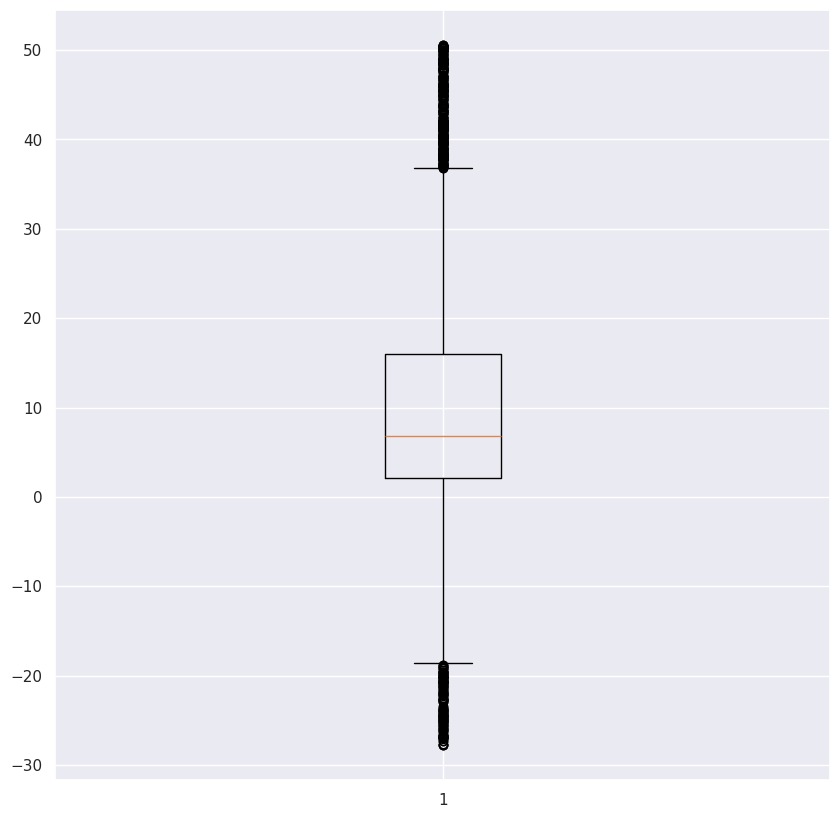

In [27]:
plt.figure(figsize = (10,10))
plt.boxplot(store_copy["Profit"])

In [28]:
#memastikan tidak ada duplikat sebelum menghapus duplikat. untuk mendapatkan gambaran dari duplikat
store_copy.describe(include="all")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,7392,7392,7392,7392,7392,7392,7392,7392,7392,7392,7392.000000,7392,7392,7392,7392,7392,7392.000000,7392.000000,7392.000000,7392.000000
unique,4281,1200,1291,4,789,789,3,1,505,48,NaN,4,1636,3,16,1618,NaN,NaN,NaN,NaN
top,CA-2022-100111,2021-09-05,2020-12-15,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,New York City,California,NaN,West,FUR-FU-10004270,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,10,32,30,4430,28,28,3869,7392,670,1543,NaN,2454,16,5050,1249,47,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55878.335227,NaN,NaN,NaN,NaN,NaN,62.314599,3.464962,0.148635,9.636050
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32114.558905,NaN,NaN,NaN,NaN,NaN,82.271335,2.041211,0.199668,13.843595
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1453.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-27.735000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23602.000000,NaN,NaN,NaN,NaN,NaN,12.960000,2.000000,0.000000,2.133200
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60188.000000,NaN,NaN,NaN,NaN,NaN,30.560000,3.000000,0.200000,6.797800
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90032.000000,NaN,NaN,NaN,NaN,NaN,75.850000,5.000000,0.200000,16.016250


In [29]:
store_copy.duplicated().sum()

np.int64(1)

In [30]:
store_copy = store_copy.drop_duplicates()

In [31]:
store_copy.duplicated().sum()

np.int64(0)

In [32]:
store_copy.to_csv('superstore_clean')

**BUSINESS INTELLIGENCE**

In [33]:
store_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7391 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       7391 non-null   object 
 1   Order Date     7391 non-null   object 
 2   Ship Date      7391 non-null   object 
 3   Ship Mode      7391 non-null   object 
 4   Customer ID    7391 non-null   object 
 5   Customer Name  7391 non-null   object 
 6   Segment        7391 non-null   object 
 7   Country        7391 non-null   object 
 8   City           7391 non-null   object 
 9   State          7391 non-null   object 
 10  Postal Code    7391 non-null   int64  
 11  Region         7391 non-null   object 
 12  Product ID     7391 non-null   object 
 13  Category       7391 non-null   object 
 14  Sub-Category   7391 non-null   object 
 15  Product Name   7391 non-null   object 
 16  Sales          7391 non-null   float64
 17  Quantity       7391 non-null   int64  
 18  Discount     

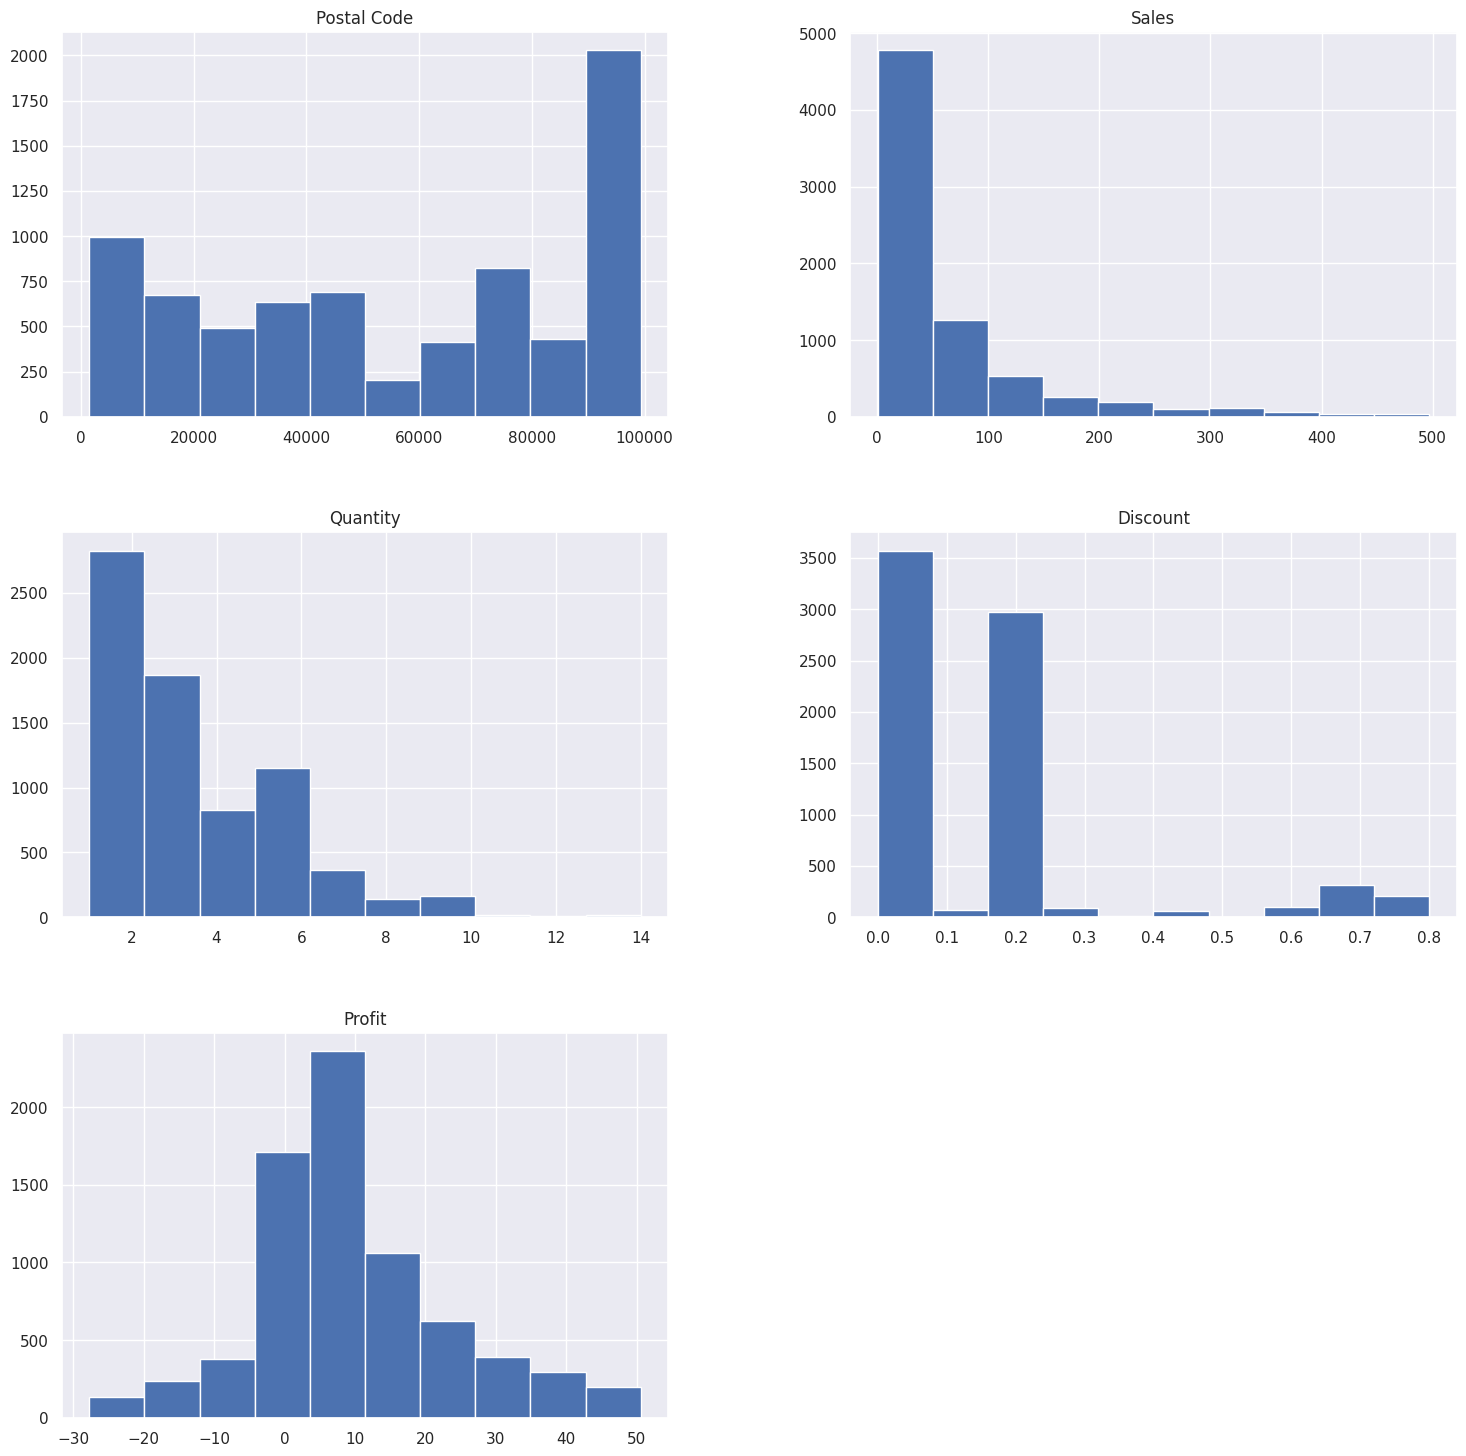

In [34]:
store_copy.hist(figsize=(18,18));

In [35]:
store_copy.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
5,CA-2019-167199,2019-01-06,2019-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,OFF-AR-10001662,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,5.480,2,0.0,1.4796


Visualisasi Persentase Profit berdasarkan Order_Date(Year)

In [36]:
#mengubah typedata order_date menjadi datetime
store_copy['Order Date'] = pd.to_datetime(store_copy['Order Date'])

#eksrak tahun dari order_date
store_copy['Order Year'] = store_copy['Order Date'].dt.year

In [37]:
#menghitung total profit pertahun
profit_per_year = store_copy.groupby('Order Year')['Profit'].sum().reset_index()

#profit keseluruhan
total_profit = profit_per_year['Profit'].sum()

#persentase profit pertahun
profit_per_year['Profit %'] = (profit_per_year['Profit'] / total_profit) * 100

/tmp/ipython-input-3419056162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=profit_per_year, x='Order Year', y='Profit %', palette='Blues_d')


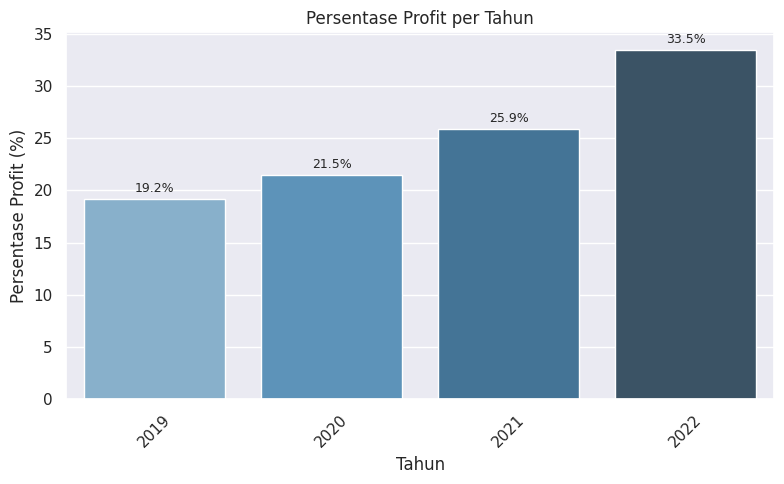

In [38]:
#Visualisasi
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=profit_per_year, x='Order Year', y='Profit %', palette='Blues_d')

for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'{v:.1f}%' for v in container.datavalues],
                 label_type='edge',
                 fontsize=9,
                 padding=3)

plt.title('Persentase Profit per Tahun')
plt.ylabel('Persentase Profit (%)')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi Sales berdasarkan Region

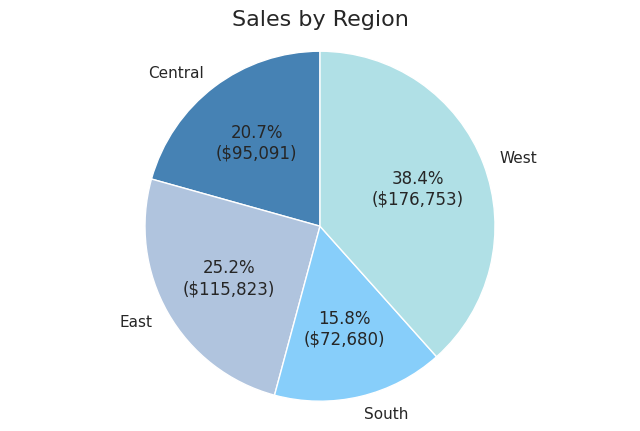

In [39]:
#menghitng total sales per region
region_sales = store_copy.groupby('Region')['Sales'].sum().reset_index()

# Pie chart
plt.figure(figsize=(8,5))

# Pie plot
plt.pie(
    region_sales['Sales'],
    labels=region_sales['Region'],
    autopct=lambda p: f'{p:.1f}%\n(${p * region_sales["Sales"].sum() / 100:,.0f})',
    startangle=90,
    colors=['steelblue', 'lightsteelblue', 'lightskyblue', 'powderblue']
)

plt.title('Sales by Region', fontsize=16)
plt.axis('equal')  # Agar pie berbentuk lingkaran
plt.show()


Visualisasi Profit berdasarkan Category dan Segmen

In [40]:
category_counts = store_copy['Category'].value_counts()
category_counts

,count
Category,
Office Supplies,5050
Furniture,1249
Technology,1092


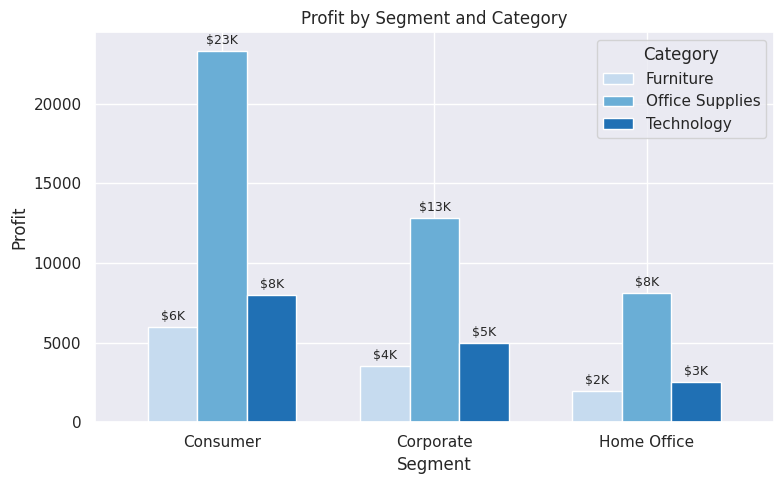

In [41]:
# Group data
grouped = store_copy.groupby(['Segment', 'Category'])['Profit'].sum().reset_index()

# Colors
colors = sns.color_palette('Blues', n_colors=3)

# Pivot data agar mudah diplot
pivot_store = grouped.pivot(index='Segment', columns='Category', values='Profit')

# Plot grouped bar chart
ax = pivot_store.plot(kind='bar', figsize=(8,5), width=0.7, color=colors)

# Tambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'${v/1e3:.0f}K' for v in container.datavalues],  # Format ribuan (K)
                 label_type='edge',
                 fontsize=9,
                 padding=3)

plt.title('Profit by Segment and Category')
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

Visualisasi Perbandingan Sales dan Profit berdasarkan Kategori

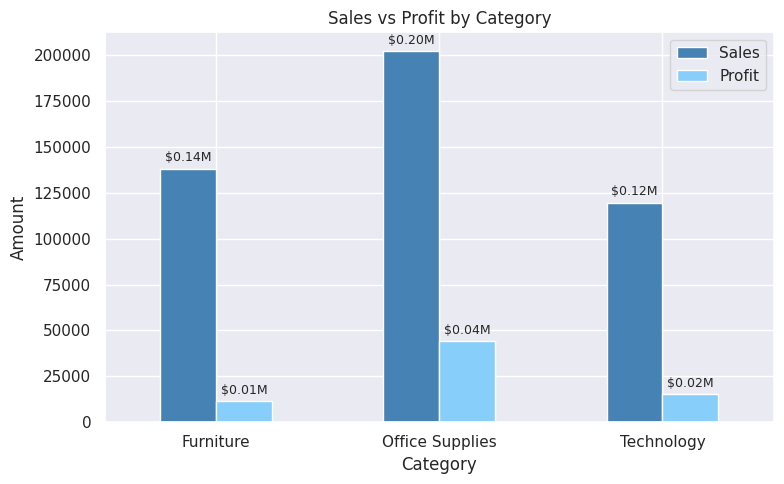

In [42]:
#Grouping data
data = store_copy.groupby('Category')[['Sales', 'Profit']].sum()

#Plot
ax = data.plot(kind='bar', figsize=(8,5), color=['steelblue', 'lightskyblue'])
plt.title('Sales vs Profit by Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()

#Tambah label angka di atas bar
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'${v/1e6:.2f}M' for v in container.datavalues],
                 label_type='edge', fontsize=9, padding=3)

plt.show()

Visualisasi Top 5 Produk yang Salesnya Terbanyak

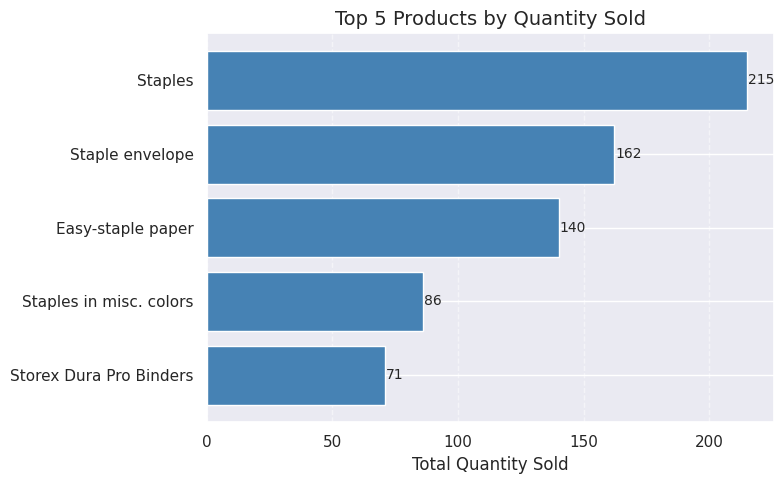

In [43]:
top5_quantity = store_copy.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(top5_quantity.index, top5_quantity.values, color='steelblue')

# Tambahkan label jumlah di ujung bar
for bar in bars:
    plt.text(bar.get_width() + 0.5,             # posisi X (kanan bar)
             bar.get_y() + bar.get_height()/2,  # posisi Y (tengah bar)
             f"{int(bar.get_width())}",         # angka quantity
             va='center', fontsize=10)

# Format chart
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.title('Top 5 Products by Quantity Sold', fontsize=14)
plt.gca().invert_yaxis()  # supaya urutan dari paling besar ke kecil
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
